In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,0,1,2,3,4,5,6,7,8,...,61,62,63,Hard E,Hard critical strain,Hard poisson's ratio,Soft E,Sotf critical strain,Soft poisson's ratio,Label
0,1_0001.01,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,50,0.02,0.07,100,0.35,0.00,good
1,1_0002.02,1.0,-2.0,-5.0,-2.0,-2.0,-2.0,0.0,0.0,-2.0,...,0.0,-2.0,-0.5,0,0.00,0.29,0,0.02,0.28,Excellent
2,1_0003.02,-2.0,-5.0,0.0,0.0,-5.0,-2.0,1.0,1.0,-2.0,...,-2.0,-0.5,-2.0,700,0.03,0.09,50,0.34,0.06,Excellent
3,1_0004.01,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1000,0.01,0.01,100,0.19,0.33,fair
4,1_0005.02,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,900,0.03,0.18,100,0.01,0.11,fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,4_15996.02,-0.5,0.0,-2.0,-2.0,-0.5,-2.0,-5.0,0.0,0.0,...,-5.0,-0.5,-0.5,650,0.04,0.21,50,0.04,0.12,good
15996,4_15997.02,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,800,0.01,0.15,100,0.03,0.14,good
15997,4_15998.01,-0.5,0.0,-5.0,0.0,-2.0,-5.0,0.0,1.0,-2.0,...,-0.5,-2.0,-2.0,150,0.01,0.09,50,0.38,0.12,Excellent
15998,4_15999.02,0.0,0.0,0.0,-0.5,1.0,-5.0,-0.5,-2.0,-2.0,...,0.0,-5.0,-2.0,600,0.00,0.10,100,0.03,0.15,good


In [4]:
train['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)
val['Label'].replace(['Excellent',"good","fair","bad"],[1,2,3,4] , inplace = True)

<AxesSubplot: >

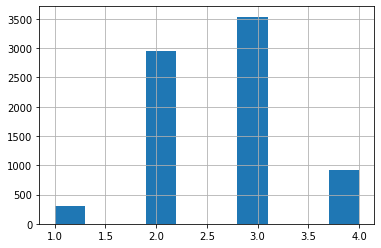

In [5]:
x = np.arange(-100,0,0.5)

train = train.replace(x,np.nan, inplace = False)
train1 = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train1.shape[0]
#train1["1"].hist()

X_train = train1.drop(["id","Label"], axis = 1)
y_train = train1["Label"]

y_train.hist()

<AxesSubplot: >

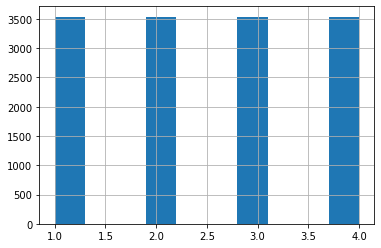

In [6]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

y_train.hist()

1.0
0.7275806451612903


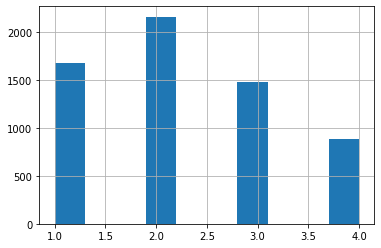

In [13]:
from sklearn.ensemble import RandomForestClassifier

train_score = []
val_score = []
X_val = val.drop(["id","Label"], axis = 1)
y_val = val["Label"]
val['Label'].hist()
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 100,max_features = 50)
randomForestModel.fit(X_train, y_train)
    
pred=randomForestModel.predict(X_val)
#print(randomForestModel.score(X_train, y_train))
#print(randomForestModel.score(X_val,y_val))
print(randomForestModel.score(X_train, y_train))
print(randomForestModel.score(X_val,y_val))
 



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
'''
param_grid = { 
    'n_estimators': [50,60,70,80,90,100],
    'max_features': [10,20,30,40,50,60],
    'max_depth' : [4,5,6,7,8,10,12,14,16,18,20]
}

gs1 = GridSearchCV(estimator = randomForestModel, param_grid=param_grid,cv = 5)
gs1_result = gs1.fit(X_train, y_train)


gs1.best_params_
'''

"\nparam_grid = { \n    'n_estimators': [50,60,70,80,90,100],\n    'max_features': [10,20,30,40,50,60],\n    'max_depth' : [4,5,6,7,8,10,12,14,16,18,20]\n}\n\ngs1 = GridSearchCV(estimator = randomForestModel, param_grid=param_grid,cv = 5)\ngs1_result = gs1.fit(X_train, y_train)\n\n\ngs1.best_params_\n"

In [14]:
#x=sorted(zip(randomForestModel.feature_importances_,X_train), reverse = False)
    

X_train_RF = X_train
X_val_RF = X_val

X = pd.concat([X_train,X_val ],axis=1)
y= pd.concat([y_train, y_val],axis=1)

for i in range(10):
    RF = RandomForestClassifier(n_estimators= 100, max_features = 5*i  ,max_depth = 10, criterion = 'entropy')
    scores = cross_val_score(RF,X,y,cv = 7,scoring = 'accuracy')

print(scores)
#RF.fit(X_train_RF, y_train)   
#pred=RF.predict(X_val_RF)
#print(RF.score(X_train_RF,y_train))
#print(RF.score(X_val_RF,y_val))
    


ValueError: Input y contains NaN.

In [10]:
test = test.drop(["id"],axis =1)
test_RF = test 

In [11]:

y_pred = RF.predict(test_RF)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["Label"])
y_pred_pd = y_pred_pd.reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators = 100)
Ada.fit(X_train_RF,y_train)
y_pred_Ada = Ada.predict(X_val_RF)

Ada.score(X_val_RF,y_val)